In [1]:
import pandas as pd # This is a library that is mainly used for data manipulation and some basic analyses
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup

import os, io

#clustering model explor data which toll is the the best to explain the data
#IDA SVD PCA, massive for HC
#https://nlpforhackers.io/topic-modeling/
#https://www.machinelearningplus.com/tag/topic-modeling/
#NOTE pyLDAvix.sklearn, TSNE nokeh plot, reduce dimension&plot graph to visulise the data

In [2]:
# path = 'gap-html'
# listFolder = os.listdir(path)

# data = pd.DataFrame(columns = ['docID','text'])
# for f in os.listdir(path):
#     listFile = os.listdir(path+"//"+f)
#     docText = ""
#     for file in listFile:
#         html = io.open(path+"//"+f+"//"+file, 'r', encoding='utf8').read()
#         soup = BeautifulSoup(html)
#         for script in soup(["script", "style"]):
#             script.extract()
        
#         text = soup.body.get_text()

#         lines = (line.strip() for line in text.splitlines())
#         text = ' '.join(l for l in lines if l)
#         docText = docText + " " + text
    
#     data = data.append({'docID': f,'text': docText}, ignore_index =True)
data = pd.read_csv("dataframe.csv")

In [3]:
data

,docID,text
0,gap_-C0BAAAAQAAJ,800020427L ► ZOI5 DICTIONARY GREEK AND ROMAN...
1,gap_2X5KAAAAYAAJ,CReSlorecl througha arant in from (The Cartw...
2,gap_9ksIAAAAQAAJ,W j ' THE HISTORY OF THE PELOPONNESIAN W...
3,gap_aLcWAAAAQAAJ,4 s3<? • ( 1 THE HISTORY OF THE DECLINE A...
4,gap_Bdw_AAAAYAAJ,University of Virginia Library DG207 L5 B3 17...
5,gap_CnnUAAAAMAAJ,Univcr? '- .-..3 General Library SystemUnive...
6,gap_CSEUAAAAYAAJ,K'E ^ - 1 ! THE HISTORY OP TUK DECLINE AND...
7,gap_DhULAAAAYAAJ,"■ I ■ . TH* DESCRIPTION OK GREECE, sr..."
8,gap_dIkBAAAAQAAJ,"a&lral BMBBIB ::l - :-,.-.-----. - j. - ' - -..."
9,gap_DqQNAAAAYAAJ,6 L I V Y. TRANSLATED BY GEORGE BAKER...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   docID   24 non-null     object
 1   text    24 non-null     object
dtypes: object(2)
memory usage: 512.0+ bytes


In [5]:
#data.to_csv(r'C:\Users\ASUS\WORK\Data mining\dataframe.csv', index = False, header=True)

# Preprocessing

In [6]:
# tokenize
# stop word + stemming
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
import re

stemmer = SnowballStemmer("english")

stop_words = set(stopwords.words('english'))

#add some irrelevent word
added_words = ['also','even','yet','lib','chapter','say','tbe','wifh','iiiiiii',
               'one','two','three','four','five','six','seven','eight','nine','ten',
              'i','ii','iii','iv','v','vii','viii','ix','x','xi','xii','xiii','xiv','xv','xvi','xvii','xviii','xix','xxi',
               'non','otho','sed','rup','qui','sec','fay','hath','thefe']

for word in added_words:
    stop_words.add(word)
print("List of stop words:", stop_words)
    
def getWordnetPos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''
    

def preprocessText(text):
    #precessing each document
    filtered = []
    #find sentences 
    rawSentences = sent_tokenize(text)
    
    for sent in rawSentences:
        #lowercase text
        newSent = sent.lower()
        #remove punctuation
        for punctuation in string.punctuation:
            newSent = newSent.replace(punctuation, '')
        #remove number
        newSent = re.sub(r'\d+', '', newSent)
        #tokenize text, find pos tag
        token = word_tokenize(newSent)
        tokenPOS = pos_tag(token)
        #remove stop words, irrelevent words, lemmatize and stem
        wl = WordNetLemmatizer()
        for tuples in tokenPOS:
            #word
            w = tuples[0]
            #pos tag
            pos = getWordnetPos(tuples[1])
            if len(w) > 2:
            #if pos != '' and len(w) > 2:
                #newWord = stemmer.stem(wl.lemmatize(w,pos=pos))
                #newWord = wl.lemmatize(w,pos=pos)
                newWord = stemmer.stem(w)
                #also remove wrong spelling words (mostly word start with fs,fl)
                if(newWord not in stop_words):
                   #and not newWord.startswith('fs') and not newWord.startswith('ft') 
                   #and not newWord.startswith('frs') and not newWord.startswith('frt') and not newWord.startswith('frr')
                  #and not newWord.startswith('frue') and not newWord.startswith('fruf') and not newWord.startswith('frud')
                   #and not newWord.startswith('frugi')):
                    filtered.append(newWord)
    return filtered

List of stop words: {'into', 'theirs', 'whom', 'd', 'ain', 'iii', "aren't", 'such', 'own', 'will', 'she', 'say', 'should', 'shan', 'of', 've', 'haven', 'being', 'mightn', 'ix', 'nine', 'himself', 'only', 'qui', 'not', 'further', 'xvii', 'xix', "mustn't", 'each', 'eight', 'non', 'at', "you've", 'more', 'too', 'their', 'ten', 'from', 'off', 'ii', 'v', 'here', 'five', 'most', 'over', 'y', 'seven', 'but', 'just', 'sed', 'our', 'so', 'won', "isn't", 'same', 'against', 'to', "needn't", 'below', 'where', 'this', 'me', 'was', 'did', 'll', 'do', 'weren', 'we', 'am', 'with', 'the', 'don', 'how', 'isn', 's', 'some', 'nor', 'hasn', 'o', 'xi', 'other', 'also', 'herself', 'an', 'm', 're', 'xiv', 'xviii', 'itself', "hadn't", 'four', 'now', 'had', 'after', 'before', 'who', 'once', 'under', 'hath', 'his', 'wifh', 'between', 'i', 'very', 'as', 'six', "she's", "don't", 'xii', 'them', 'until', 'xvi', 'sec', 'is', 'all', 'myself', "you'll", 'or', 'even', 'few', 'tbe', 'does', 'him', 'shouldn', 'they', 'on'

In [7]:
data['token'] = data['text'].apply(preprocessText)
data['token']

0     [zoi, dictionari, greek, roman, geographi, dic...
1     [creslorecl, througha, arant, cartwright, foun...
2     [histori, peloponnesian, war, translat, greek,...
3     [histori, declin, fall, roman, empir, edward, ...
4     [univers, virginia, librari, ald, histori, rom...
5     [univcr, general, librari, systemunivers, wisc...
6     [histori, tuk, declin, fall, roman, empir, edw...
7     [descript, greec, aus, descript, greec, paus, ...
8     [alral, bmbbib, histori, rome, theodor, mommse...
9     [translat, georg, baker, vol, london, print, v...
10    [histori, peloponnesian, warbi, thucydid, vol,...
11    [gibbon, histori, declin, fall, roman, empir, ...
12    [gibbon, histori, declin, fall, roman, empir, ...
13    [harvard, collegelibrari, bequest, john, harve...
14    [collegelibrari, titus, liviusroman, translat,...
15    [work, joseph, life, written, himselftransl, o...
16    [ifilrrarg, tyxmteian, httiirr, itgt, work, co...
17    [harvard, collegelibrari, mrprntnt, thayer

feature: 419196
[('citi', 10768), ('roman', 10551), ('time', 8806), ('name', 8670), ('place', 7431), ('great', 7383), ('would', 7204), ('war', 7006), ('king', 6739), ('upon', 6671), ('call', 6406), ('ani', 6194), ('part', 6172), ('onli', 5968), ('peopl', 5862), ('first', 5815), ('made', 5588), ('year', 5458), ('might', 5082), ('son', 4868), ('veri', 4868), ('befor', 4856), ('town', 4807), ('ofth', 4742), ('may', 4674), ('men', 4656), ('day', 4627), ('countri', 4497), ('armi', 4461), ('god', 4373), ('could', 4323), ('enemi', 4235), ('rome', 4194), ('still', 4121), ('order', 4070), ('templ', 3967), ('without', 3899), ('jew', 3817), ('appear', 3700), ('ancient', 3680), ('everi', 3649), ('general', 3630), ('mani', 3571), ('empir', 3566), ('power', 3431), ('vol', 3387), ('see', 3382), ('near', 3367), ('mention', 3361), ('river', 3333), ('law', 3299), ('chap', 3257), ('though', 3229), ('accord', 3222), ('said', 3185), ('among', 3177), ('histori', 3165), ('state', 3126), ('death', 3054), ('ar

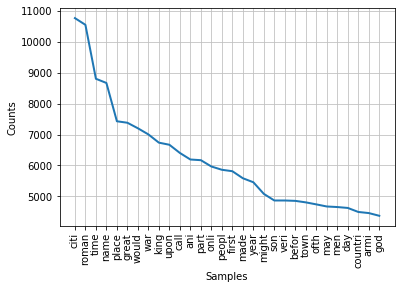

In [8]:
from nltk.probability import FreqDist

def count(df,rowName):
    wordList = []
    for index, row in df.iterrows():
        for w in row[rowName]:
            wordList.append(w)
    fdist = FreqDist(wordList)
    print("feature:",len(fdist))
    print(fdist.most_common(150))
    fdist.plot(30,cumulative=False)
    return len(fdist)

f = count(data,'token')

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

from sklearn.decomposition import TruncatedSVD

numTopic = 10
topWords = 6

def display_topics(model, features, topWords):
    for topicId, topic in enumerate(model.components_):
        print("Topic",topicId,": "," ".join([features[i]
                        for i in topic.argsort()[:-topWords - 1:-1]]))

def topicDocument(doc):
    vec = CountVectorizer(stop_words='english')
    tf= vec.fit_transform([doc])
    feature = vec.get_feature_names()
    lda = LatentDirichletAllocation(n_components=numTopic).fit(tf)
    
    display_topics(lda, feature, topWords)
    
data['processedText'] = data['token'].str.join(" ")

#min_df = 0.015

tfvec = CountVectorizer(stop_words='english', max_df=0.90, min_df=0.10)
tf = tfvec.fit_transform(data['processedText'])
tffeature = tfvec.get_feature_names()

tfidfvec = TfidfVectorizer(stop_words='english', max_df=0.90, min_df=0.10)
tfidf = tfidfvec.fit_transform(data['processedText'])
tfidffeature = tfidfvec.get_feature_names()


lda = LatentDirichletAllocation(n_components=numTopic, max_iter=10).fit(tf)

nmf = NMF(n_components=numTopic, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

print("LDA")
display_topics(lda, tffeature, topWords)
print("======================")
print("NMF")
display_topics(nmf, tfidffeature, topWords)
# data['processedText'].apply(topicDocument)

LDA
Topic 0 :  galba vitellius tacitus legion cum quam
Topic 1 :  torn emperor chap justinian declin christian
Topic 2 :  jew herod chap josephus jerusalem prophet
Topic 3 :  emperor christian declin hist august legion
Topic 4 :  julian emperor declin constantius theodosius constantin
Topic 5 :  indicationof admitof moulder behov offir sinist
Topic 6 :  strab site plin plini strabo district
Topic 7 :  nero tiberius tacitus germanicus emperor augustus
Topic 8 :  sulla italian consul chap gracchus polit
Topic 9 :  athenian consul peloponnesian chap honour dictat
NMF
Topic 0 :  justinian emperor chap torn declin belisarius
Topic 1 :  jew herod josephus jerusalem chap hyrcanus
Topic 2 :  consul samnit pretor livi hannib carthaginian
Topic 3 :  athenian peloponnesian syracusan lacedaemonian argiv alcibiad
Topic 4 :  nero tacitus legion germanicus emperor section
Topic 5 :  strab site steph plin strabo plini
Topic 6 :  patrician faid mould plebeian veii fide
Topic 7 :  nec cum quam ann aut n

In [23]:
svd= TruncatedSVD(n_components=2)
plotData = svd.fit_transform(tfidf)
df = pd.DataFrame(columns=['x', 'y', 'document'])
df['x'], df['y'], df['document'] = plotData[:,0], plotData[:,1], range(24)

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()

source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="document", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')

plot = figure(plot_width=500, plot_height=500)
plot.circle("x", "y", source=source, size=12, line_color="black", color="red", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

Loading BokehJS ...

In [11]:
svd = TruncatedSVD(n_components=2)
words_2d = svd.fit_transform(tfidf.T)
 
df = pd.DataFrame(columns=['x', 'y', 'word'])
df['x'], df['y'], df['word'] = words_2d[:,0], words_2d[:,1], tfidfvec.get_feature_names()
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

In [12]:
print(tf.shape)
print(tf.toarray())

print(tfidf.shape)
print(tfidf.toarray())

(24, 34303)
[[27 66 34 ... 17 10  2]
 [ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 ...
 [ 1  1  0 ...  0  0  0]
 [ 0  2  1 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]]
(24, 34303)
[[0.00743599 0.01268461 0.01016458 ... 0.00435479 0.00256164 0.00059792]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00114949 0.         ... 0.         0.         0.        ]
 ...
 [0.00117434 0.00081951 0.         ... 0.         0.         0.        ]
 [0.         0.00193492 0.0015049  ... 0.         0.         0.        ]
 [0.         0.00170485 0.         ... 0.         0.         0.        ]]


In [26]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, tf, tfvec, mds='tsne')
panel
 

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      32.420952   8.115230       1        1  26.252536
6       0.648955  71.707100       2        1  26.041219
2      71.019684   9.971006       3        1  18.889351
9       3.785981  33.185135       4        1  14.116066
0     -42.666500  -9.222070       5        1   4.666564
8      -3.621689 -43.526516       6        1   4.078489
3      -3.632402  -4.171708       7        1   3.896284
4     -36.584400  35.804413       8        1   1.217124
7      44.391380  50.615383       9        1   0.842106
5      40.235809 -31.591665      10        1   0.000260, topic_info=            Term        Freq        Total Category  logprob  loglift
9194     emperor  2772.00000  2772.000000  Default   30.000  30.0000
15429        jew  3743.00000  3743.000000  Default   29.000  29.0000
7766      declin  1554.00000  1554.000000  Default   28.000  28.0000
5853        chap  3160.00000  3160.000000  Default   27.000  27.0000
18522       nero   687.00000   687.000000  Default   26.000  26.0000
...          ...         ...          ...      ...      ...      ...
15201      itmad     0.00007     5.608031  Topic10  -10.443   1.5673
3286      astorm     0.00007     4.620009  Topic10  -10.443   1.7611
8259   dignityto     0.00007     3.703563  Topic10  -10.443   1.9822
20301       orno     0.00007     3.726697  Topic10  -10.443   1.9760
4619     boileau     0.00007     3.726650  Topic10  -10.443   1.9760

[723 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
25         1  0.984213       abbassid
143        1  0.977217         abubek
147        1  0.990103  abulpharagius
251        2  0.984246          achel
317        2  0.978735       acropoli
...      ...       ...            ...
34299      3  0.973835      zorobabel
34301      1  0.015686        zosimus
34301      2  0.078432        zosimus
34301      7  0.611770        zosimus
34301      8  0.290199        zosimus

[2341 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 3, 10, 1, 9, 4, 5, 8, 6])

2 _clusters: 0.1780616324006293
3 _clusters: 0.21364716474702194
4 _clusters: 0.25081762315503076
5 _clusters: 0.30876716447565294
6 _clusters: 0.3196047133756393
7 _clusters: 0.3282381014898221
8 _clusters: 0.3471587411481159
9 _clusters: 0.3516401422260884
10 _clusters: 0.3340738997750005
11 _clusters: 0.3213879873367604
12 _clusters: 0.31554668596699637
13 _clusters: 0.31594270562414645
14 _clusters: 0.3463435987408376


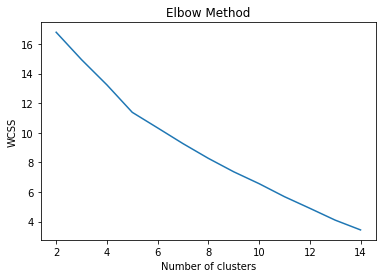


documents group:
Cluster 0 :  3 6 11 12 20 22
Cluster 1 :  5 15 18 23
Cluster 2 :  9 17
Cluster 3 :  2 10
Cluster 4 :  21
Cluster 5 :  7
Cluster 6 :  1 13 16
Cluster 7 :  0 19
Cluster 8 :  4 8 14

Document 8 in cluster 7
Document 9 in cluster 6
Document 10 in cluster 3
Document 11 in cluster 0
Document 12 in cluster 8
Document 13 in cluster 1
Document 14 in cluster 0
Document 15 in cluster 5
Document 16 in cluster 8
Document 17 in cluster 2
Document 18 in cluster 3
Document 19 in cluster 0
Document 20 in cluster 0
Document 21 in cluster 6
Document 22 in cluster 8
Document 23 in cluster 1
Document 24 in cluster 6
Document 25 in cluster 2
Document 26 in cluster 1
Document 27 in cluster 7
Document 28 in cluster 0
Document 29 in cluster 4
Document 30 in cluster 0
Document 31 in cluster 1

0 : emperor, justinian, chap, declin, torn, christian, constantinopl, belisarius, constantin, goth, honour, hist, church, mahomet, gothic, persian, east, julian, caliph, arab, saracen, procopius, heracli

In [35]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

bestCluster = 0
bestScore = 0
wcss = []
for i in range(2,15):
    kmeans_model = KMeans(n_clusters=i, max_iter=300, n_init=10).fit(tfidf)
    labels = kmeans_model.labels_
    wcss.append(kmeans_model.inertia_)
    score = metrics.silhouette_score(tfidf, labels, metric='cosine')
    print(i,"_clusters:", score)
    if(bestScore < score):
        bestCluster = i
        bestScore = score
plt.plot(range(2, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=bestCluster, max_iter=300, n_init=10).fit(tfidf)
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
doc_label = kmeans.labels_
print()
print("documents group:")
i = 0
doc_group = []
for i in range(bestCluster):
    docsgroup = ""
    for j in range(len(doc_label)):
        if(i == doc_label[j]):
            docsgroup = docsgroup + " " + str(j)
    print("Cluster "+ str(i) +" : " +docsgroup)
print()
# for l in doc_label:
#     print("Document "+ str(i) +" in cluster "+ str(l))
#     i = i + 1
# print()
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(tfidffeature[word] for word in centroid))

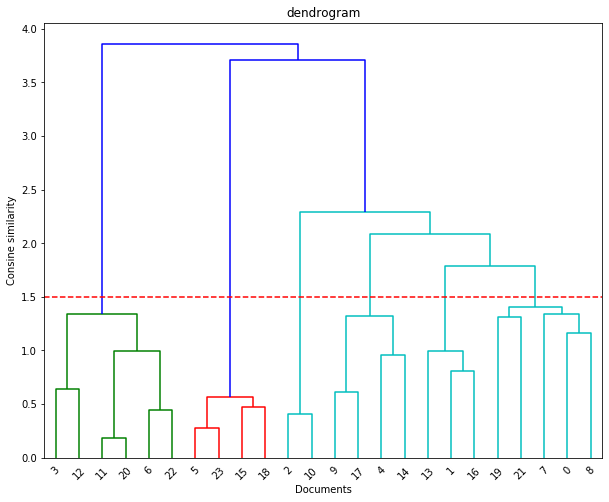

In [52]:
import scipy.cluster.hierarchy as shc
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

plt.figure(figsize=(10, 8))  
plt.title("dendrogram")  
dend = shc.dendrogram(shc.linkage(cosine_similarity(tfidf), method='ward'))
plt.xlabel('Documents')
plt.ylabel('Consine similarity')
plt.axhline(y=1.5, color='r', linestyle='--')